> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

- Which month has the highest number of movie released? 
- Which is the most popular movies genre in the dataset?
- Who is the director with the most number of movies?
- Has there been a significant change in the budget for movies over time?
- Is there a relationship between the amount of money spent in making a movie and the revenue made from the movie?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import itertools

import csv

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### Load and inspect the data
- visualize the structure of the data using `.head()`
- how many rows and columns are in the data
- how many rows are duplicated?
- are there columns with missing values?

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
url = r"https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv"
movies = pd.read_csv(url)
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
print(f"Number of rows {movies.shape[0]}\nNumber of columns {movies.shape[1]}")
print(f"Number of duplicated rows {movies.duplicated().sum()}")
print(f"Number of missing values in each column:\n{movies.isnull().sum()}")
print(f"\nData type for each column and number of values available in the column\n{movies.info()}")

Number of rows 10866
Number of columns 21
Number of duplicated rows 1
Number of missing values in each column:
id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget              

From `movies.isnull().sum()` output, there are columns with missing values. `[homepage, tagline, keywords, production_companies]` are the columns with the most missing values, hence dropping them considering the questions we want to answer is a good option. Also, `[id, imbd_id]` appear to be just movies unique IDs and dropping the two columns would not disrupt the data. `Overview` has very few missing values but will be dropped because I don't consider it very helpful to answer the questions posed. This column might come in handy in a natural landuage processing project. For `[cast, genres, director]`, there are very few missing values, hence we will use `dropna()` to drop rows with missing values from these columns.

From `movies.info()` output, the release date comes as a `string` in the dataset. This, we will want to change it to a `datetime` object to make it more convenient to make use of pandas time series data analysis functions.

In [5]:
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Using `describe()` indicates that there are movies with a budget and revenue of zero. Intuitively, this should not the case. How many of these these movies have a budget of zero?

In [6]:
movies.astype(bool).sum(axis=0)

id                      10866
imdb_id                 10866
popularity              10866
budget                   5170
revenue                  4850
original_title          10866
cast                    10866
homepage                10866
director                10866
tagline                 10866
keywords                10866
overview                10866
runtime                 10835
genres                  10866
production_companies    10866
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj               5170
revenue_adj              4850
dtype: int64

`5170` movies in the dataframe have a budget value different from zero and `4850` movies have a revevue value different from zero. Dropping these values implies getting rid of most of the data and would probably leave us with data that not much can be inferred from. Hence, we either keep the columns as they are or change the zeros to nan values.

Also, a runtime of zero suggest that there was no movie. From the cell above, there are a few movies with a zero runtime, that should probably be a data entry mistake. Since, the number of movies with zero runtime are pretty small, we can go ahead and drop the records with zero runtime. This, will leave us with data from which we can still be able to draw insights from.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

- Drop duplicates (from the cells above, there is one duplicated row)
- drop columns with too many missing values.

 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
def clean_data(df, cols_to_drop, col_to_change_dtype, cols_to_drop_nans):
    """Cleans a dataframe by:
    
    - removing duplicates
    - drop specified columns
    - drop missing values
    - drop rows where runtime is zero
    """
    df = df.drop_duplicates()
    df = df.drop(cols_to_drop, axis=1)
    df[col_to_change_dtype] = pd.to_datetime(df[col_to_change_dtype])
    df = df.dropna(subset = cols_to_drop_nans)
    df = df[df.runtime > 0]
    df[['budget', 'revenue',
        'budget_adj', 'revenue_adj']] = df[['budget', 'revenue',
                                            'budget_adj', 'revenue_adj']].replace(0, np.NaN)
    return df

cols = ['id','imdb_id', 'homepage', 'tagline',
        'keywords', 'production_companies', 'overview']
date_col = 'release_date'
nan_cols = ['cast', 'genres', 'director']
movies['release_year'] = movies['release_year'].astype(str)
movies[date_col] = movies[date_col].str.split('/').str[0:2].apply('/'.join) + '/' + movies['release_year']

clean_movies = clean_data(movies, cols, date_col, nan_cols)

In [8]:
clean_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10703 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10703 non-null float64
budget            5150 non-null float64
revenue           4843 non-null float64
original_title    10703 non-null object
cast              10703 non-null object
director          10703 non-null object
runtime           10703 non-null int64
genres            10703 non-null object
release_date      10703 non-null datetime64[ns]
vote_count        10703 non-null int64
vote_average      10703 non-null float64
release_year      10703 non-null object
budget_adj        5150 non-null float64
revenue_adj       4843 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Which month has the highest number of movie released?

In [9]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
month_of_year_analysis = clean_movies.groupby(clean_movies['release_date'].dt.month).agg(No_movies=pd.NamedAgg(column="release_date",
                                                                                                               aggfunc="count")).reset_index()
month_of_year_analysis['release_month'] = month_of_year_analysis.release_date.apply(lambda x: calendar.month_abbr[x])
month_of_year_analysis

,release_date,No_movies,release_month
0,1,888,Jan
1,2,679,Feb
2,3,811,Mar
3,4,789,Apr
4,5,804,May
5,6,819,Jun
6,7,789,Jul
7,8,906,Aug
8,9,1318,Sep
9,10,1133,Oct


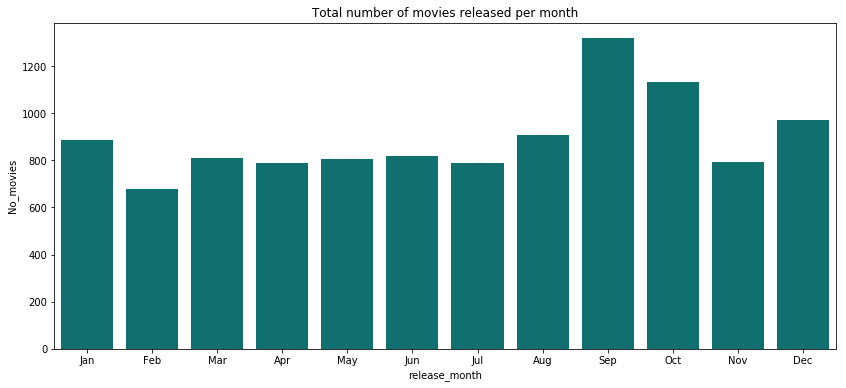

In [10]:
plt.figure(figsize = (14, 6))
ax = sns.barplot(x="release_month", y="No_movies", data=month_of_year_analysis, color='teal');
ax.set_title("Total number of movies released per month")
plt.show()

The bar plot indicates that after cleaning the dataset, September had the highest number of movie release and February had the lowest. This does not however suggest that for the time period covered in the dataset, that most movies are released in september every year. This analysis just tells us that a lot movies in the dataframe were released in Septemper.

### Research Question 2: Which is the most popular movies genre in the dataset?

In [11]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

def split_piped_features(feature): 
    feature_dict = {}
    for item in clean_movies[feature]:
        item_list = item.split('|')
        for feature in item_list:
            if feature not in feature_dict:
                feature_dict[feature] = 1
            else:
                feature_dict[feature] += 1
    feature_tuple = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)
    sorted_feature_dict = dict((x, y) for x, y in feature_tuple)
    return sorted_feature_dict
genre_dict = split_piped_features('genres')

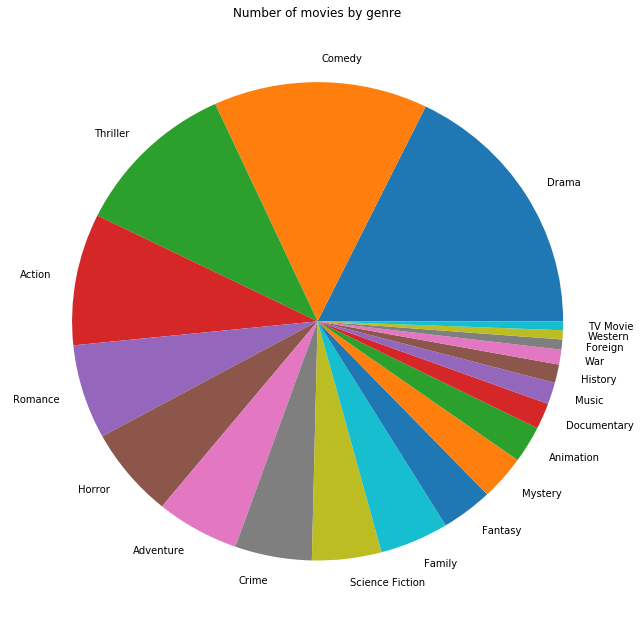

In [12]:
plt.figure(figsize = (11, 11))
plt.pie(genre_dict.values(), labels=genre_dict.keys())
plt.title("Number of movies by genre")
plt.show()

`Drama` appears to be the dorminant genre in the data set while `TV Movie` is the least frequent genre in the data set.

### Research Question 3: Who is the director with the most number of movies?

In [13]:

most_popular_director = dict(itertools.islice(split_piped_features('director').items(), 1))
most_popular_director

{'Woody Allen': 46}

The director with the most movies is `Woody Allen` who has directed `46` movies in the cleaned data set.

### Research Question 4: Has there been a significant change in the yearly budget for movies over time?

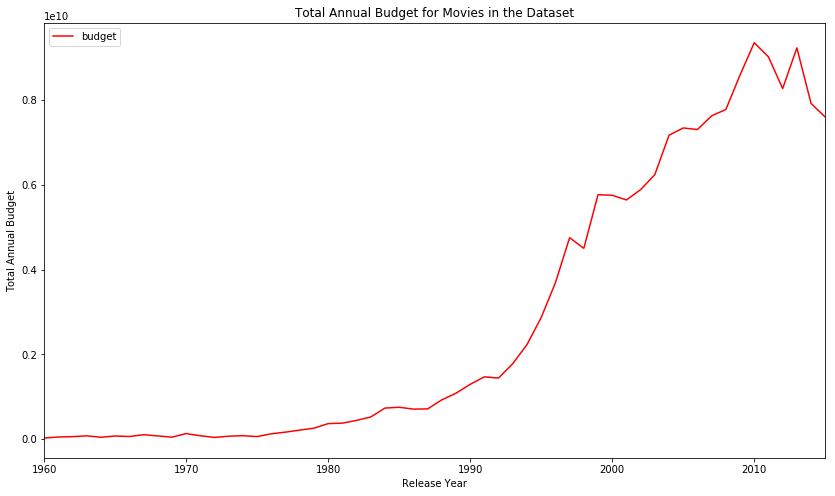

In [14]:
yearly_budget = clean_movies.groupby('release_year', as_index=False)['budget'].sum()

plt.rcParams['figure.figsize'] = [14, 8]
yearly_budget.plot(x='release_year', y='budget', kind='line', color='red')
plt.title("Total Annual Budget for Movies in the Dataset")
plt.ylabel("Total Annual Budget")
plt.xlabel("Release Year")

plt.show()

From the line plot above, it is clear that there has been a significant change in the annual movie budget from 1960 to 2015. With steady and about the same budget from 1960 to the around 1990. From 1990, there has been a colossal change in the budget. To answer the question, yes, there has been a significant change in the budget. To have a better understanding of how and why the increase, the aspect of inflation should be considered. However, that is beyond the scope of this analysis.

### Research Question 5: How does movie popularity affect its profit?

In [15]:
df = clean_movies.loc[:, ['popularity', 'budget', 'revenue']]
df['profit'] = df['revenue'] - df['budget']
df.head()

,popularity,budget,revenue,profit
0,32.985763,150000000.0,1.513529e+09,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,1.316249e+09


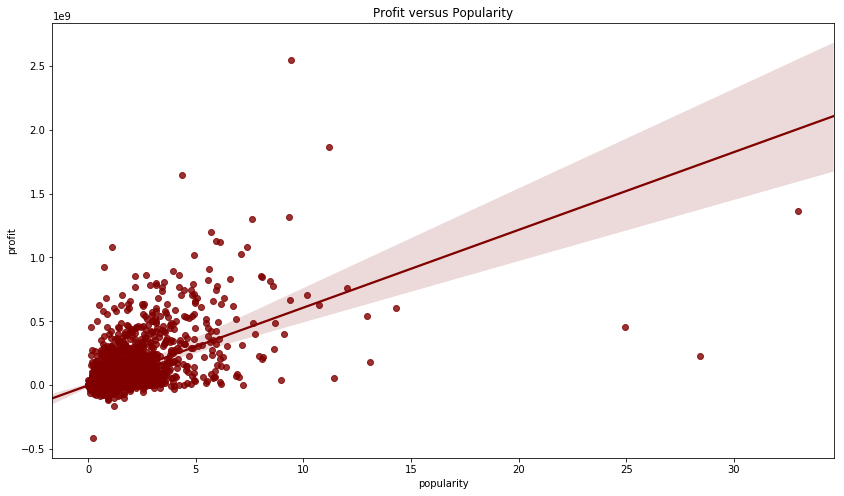

In [16]:
ax = sns.regplot(x='popularity', y='profit', data=df, color='maroon')
ax.set_title("Profit versus Popularity");

In [17]:
df.corr()

,popularity,budget,revenue,profit
popularity,1.000000,0.479140,0.629167,0.596080
budget,0.479140,1.000000,0.688403,0.526660
revenue,0.629167,0.688403,1.000000,0.979138
profit,0.596080,0.526660,0.979138,1.000000


The regression plot and the correlation analysis suggests that there is a relationship between the profit and popularity. As the popularity increases, the profit generated increases. However, correlation doesn't imply causation. Hence, the need for more analysis to confirm this suggested relationship between popularity and profit.

### Research Question 6: How has movie duration changed with time?

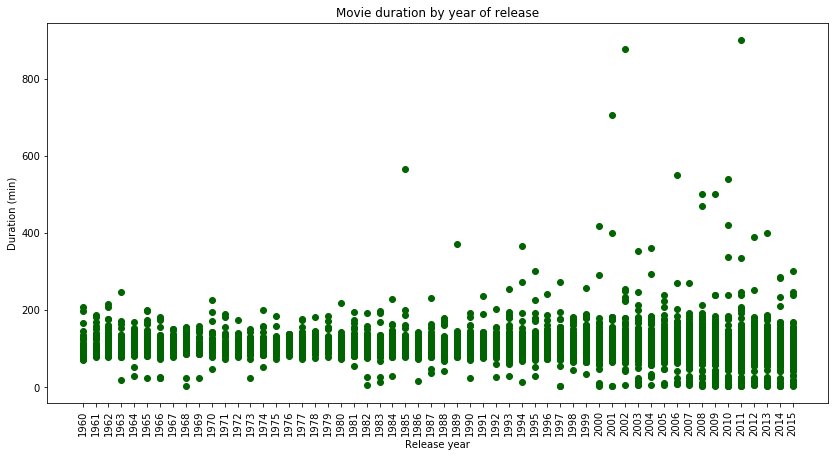

In [18]:
fig = plt.figure(figsize=(14,7))

# Create a scatter plot of duration versus release_year
plt.scatter(clean_movies['release_year'], 
            clean_movies['runtime'], color='darkgreen')
# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.ylabel("Duration (min)")
plt.xlabel("Release year")

plt.xticks(rotation=90);

There is no clear indication of any insightful change in the movie runtime over the years.

### Research Question 7: Does duration affect popularity?

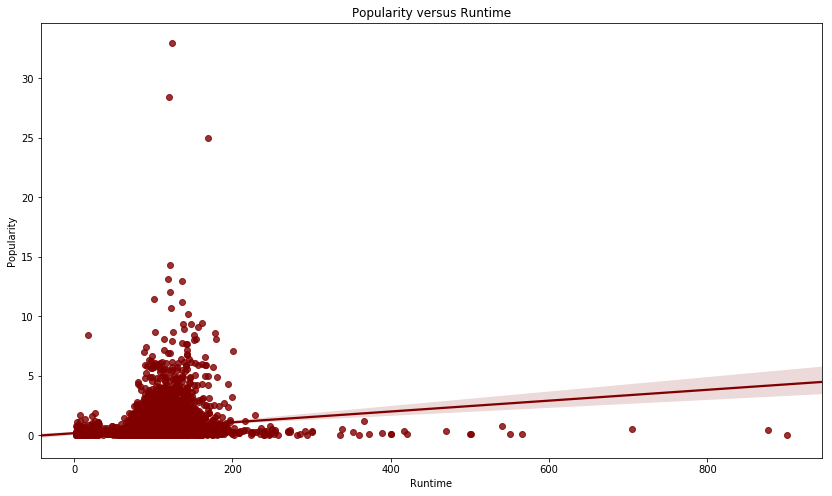

In [19]:
ax = sns.regplot(x='runtime', y='popularity', data=clean_movies, color='maroon')
ax.set_title("Popularity versus Runtime");
plt.ylabel("Popularity")
plt.xlabel("Runtime");

The plot shows that the most popular movies have a runtime in the range 0 to 200. Any movie with a runtime above this tends to be less popular.

<a id='conclusions'></a>
## Conclusions

> **Findings and the results**
- Which month has the highest number of movie released? **September**
- Which is the most popular movies genre in the dataset? **Drama**
- Who is the director with the most number of movies? **Woody Allen**
- Has there been a significant change in the budget for movies over time? **Movie budgets have increased significantly over time**
- How does movie popularity affect its profit? **The graph suggests profit increases with popularity**
- How has movie duration changed with time? **There is no major change in movie runtime over the years.**
- Does duration affect popularity? **Shorter movies tend to be more popular**

> **Limitations**:
- The influence of inflation has not be considered in the analysis.
- Too many missing values in the budget column to have a clear idea of the relation between profit and popularity.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0